# Luis Verde, Matplotlib homework.

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
df_mouse=pd.read_csv(mouse_drug_data_to_load)
df_clinical_trial=pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset
merge_df = pd.merge(df_clinical_trial, df_mouse, on="Mouse ID")
# Display the data table for preview
merge_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_df=merge_df.groupby(["Drug","Timepoint"])
# Convert to DataFrame
df_mean=grouped_df[["Drug","Timepoint"]]
df_mean=grouped_df["Tumor Volume (mm3)"].mean().to_frame("Tumor Volume (mm3)(avg)")
# Preview DataFrame
df_mean=df_mean.reset_index()
df_mean.head()

,Drug,Timepoint,Tumor Volume (mm3)(avg)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
df_sem=grouped_df[["Drug","Timepoint"]]
# Convert to DataFrame
df_sem=grouped_df["Tumor Volume (mm3)"].sem().to_frame("Tumor Volume (mm3)(SE)")
# Preview DataFrame
df_sem=df_sem.reset_index()
df_sem.head()

,Drug,Timepoint,Tumor Volume (mm3)(SE)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
df_t_mean=df_mean.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)(avg)')
df_sem=df_sem.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)(SE)')
# Preview that Reformatting worked
df_t_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


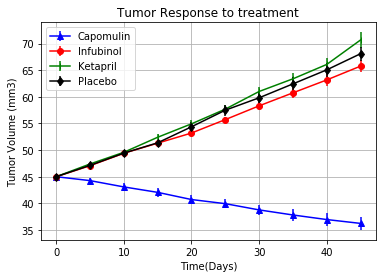

In [54]:
# Generate the Plot (with Error Bars)
df_t_mean['Capomulin'].plot(x='Timepoint', yerr=df_sem['Capomulin'] ,color='b', label='Capomulin', marker='^', grid=True)
df_t_mean['Infubinol'].plot(x='Timepoint', yerr=df_sem['Infubinol'] , color='r', label='Infubinol', marker='o',grid=True)
df_t_mean['Ketapril'].plot(x='Timepoint', yerr=df_sem['Ketapril'] , color='g', label='Ketapril', marker='|',grid=True)
df_t_mean['Placebo'].plot(x='Timepoint', yerr=df_sem['Placebo'] , color='k', label='Placebo', marker='d',grid=True)
plt.legend()
plt.xlabel('Time(Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Response to treatment')

# Save the Figure
plt.savefig("../Images/tumor_response.png")

In [6]:
# Show the Figure
plt.show()

# Observable trend based on the data

-From the drugs of interest in this study the Capomulin is the one with the best response from the point of view of the reduction of the tumor volume, the other ones Infubinol and Ketapril produce a response very similar to the placebo.

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
df_mean_metastatic_sites=grouped_df["Metastatic Sites"].mean().to_frame("Metastatic Sites (avg)")
# Convert to DataFrame

# Preview DataFrame
df_mean_metastatic_sites.head()

Metastatic Sites (avg)
Drug      Timepoint                        
Capomulin 0                        0.000000
          5                        0.160000
          10                       0.320000
          15                       0.375000
          20                       0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
df_sem_metastatic_sites=grouped_df["Metastatic Sites"].sem().to_frame("Metastatic Sites (SE)")
# Convert to DataFrame

# Preview DataFrame
df_sem_metastatic_sites.head()

Metastatic Sites (SE)
Drug      Timepoint                       
Capomulin 0                       0.000000
          5                       0.074833
          10                      0.125433
          15                      0.132048
          20                      0.161621

In [9]:
# Minor Data Munging to Re-Format the Data Frames
df_mean_metastatic_sites=df_mean_metastatic_sites.reset_index()
df_t_mean_met=df_mean_metastatic_sites.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites (avg)')
df_sem_metastatic_sites=df_sem_metastatic_sites.reset_index()
df_t_sem_metastatic_sites=df_sem_metastatic_sites.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites (SE)')
# Preview that Reformatting worked
df_t_mean_met.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


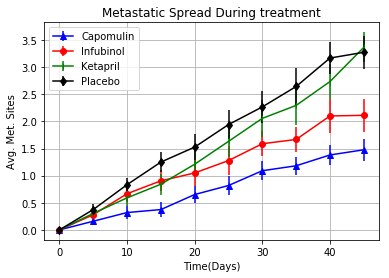

In [55]:
# Generate the Plot (with Error Bars)
df_t_mean_met['Capomulin'].plot(x='Timepoint', yerr=df_t_sem_metastatic_sites['Capomulin'] ,color='b', label='Capomulin', marker='^', grid=True)
df_t_mean_met['Infubinol'].plot(x='Timepoint', yerr=df_t_sem_metastatic_sites['Infubinol']  , color='r', label='Infubinol', marker='o',grid=True)
df_t_mean_met['Ketapril'].plot(x='Timepoint', yerr=df_t_sem_metastatic_sites['Ketapril']  , color='g', label='Ketapril', marker='|',grid=True)
df_t_mean_met['Placebo'].plot(x='Timepoint', yerr=df_t_sem_metastatic_sites['Placebo']  , color='k', label='Placebo', marker='d',grid=True)
plt.legend()
plt.xlabel('Time(Days)')
plt.ylabel('Avg. Met. Sites')
plt.title('Metastatic Spread During treatment')

# Save the Figure
plt.savefig("../Images/Avg_Met_Sites.png")

In [56]:
# Show the Figure
plt.show()

# Observable trend based on the data
-From the drugs of interest in this study the Capomulin is the one with the best response from the point of view of the metastatic average sited, Infubinol also has and impact althought is less efective and Ketapril produce a response very similar to the placebo.

## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
df_mouse_sum=grouped_df["Mouse ID"].count().to_frame("Mouse Count")
# Convert to DataFrame

# Preview DataFrame
df_mouse_sum.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [13]:
# Minor Data Munging to Re-Format the Data Frames
df_mouse_sum=df_mouse_sum.reset_index()
df_t_mouse=df_mouse_sum.pivot(index='Timepoint', columns='Drug', values='Mouse Count')
# Preview the Data Frame
df_t_mouse.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


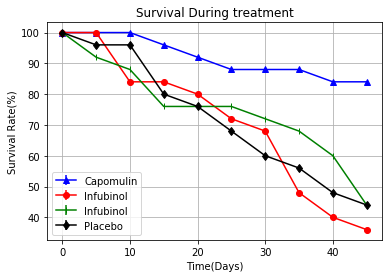

In [14]:
# Generate the Plot (Accounting for percentages)
df_mouse_percentage=(100. * df_t_mouse / df_t_mouse.iloc[0]).round(1)
df_mouse_percentage['Capomulin'].plot(x='Timepoint', yerr=0.1 ,color='b', label='Capomulin', marker='^', grid=True)
df_mouse_percentage['Infubinol'].plot(x='Timepoint', yerr=0.1 , color='r', label='Infubinol', marker='o',grid=True)
df_mouse_percentage['Ketapril'].plot(x='Timepoint', yerr=0.1 , color='g', label='Infubinol', marker='|',grid=True)
df_mouse_percentage['Placebo'].plot(x='Timepoint', yerr=0.1 , color='k', label='Placebo', marker='d',grid=True)
plt.legend()
plt.xlabel('Time(Days)')
plt.ylabel('Survival Rate(%)')
plt.title('Survival During treatment')

# Save the Figure
plt.savefig("../Images/survival_rate.png")
# Show the Figure
plt.show()

# Observable trend based on the data
-From the drugs of interest in this study the Capomulin is the one with the best response from the point of view of the survival rate of the mice at the end of the 45 days of the study,  Ketapril produce a response very similar to the placebo, while Infubinol has the worst performance having a survival rate lower than the placebo.

## Summary Bar Graph

In [15]:
# Calculate the percent changes for each drug
df_percentage_change=(100. * (df_t_mean.iloc[9]-df_t_mean.iloc[0]) / df_t_mean.iloc[0]).round(1)
# Display the data to confirm
df_percentage_change

Drug
Capomulin   -19.5
Ceftamin     42.5
Infubinol    46.1
Ketapril     57.0
Naftisol     53.9
Placebo      51.3
Propriva     47.2
Ramicane    -22.3
Stelasyn     52.1
Zoniferol    46.6
dtype: float64

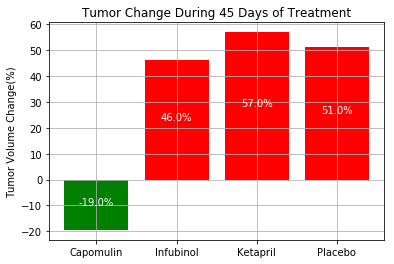

In [52]:
# Store all Relevant Percent Changes into a Tuple
percentage_change= df_percentage_change[0], df_percentage_change[2], df_percentage_change[3], df_percentage_change[5]

# Splice the data between passing and failing drugs
falling=[i for i in df_percentage_change if i >= 0]
passing=[i for i in df_percentage_change if i < 0]
# Orient widths. Add labels, tick marks, etc. 
x_axis = np.arange(len(percentage_change))
drugs= 'Capomulin', 'Infubinol', 'Ketapril', "Placebo"
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs)
plt.grid()
plt.ylabel('Tumor Volume Change(%)')
plt.title('Tumor Change During 45 Days of Treatment')
colors=['r' if i >= 0  else 'g' for i in percentage_change]
rects=plt.bar(x_axis, percentage_change, color=colors, align="center")

# Use functions to label the percentages of changes
def autolabel(rects):
    #define and call the funtion to label
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., height/2,
                '%2.1f' % int(height)+'%', color = 'w',
                ha='center')

# Call functions to implement the function calls
autolabel(rects)

# Save the Figure
plt.savefig("../Images/tumor_change.png")

# Show the Figure
# fig.show("../Images/tumor_change.png")


# Observable trend based on the data

-From the drugs of interest in this study the Capomulin is the one with the best response from the point of view of the tumor volume change on the mices at the end of the 45 days of the study since the tumor reduce sizes on an average of 19.5%, while Ketapril and Infubinol actually produce a response very similar to the placebo.
